In [12]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
#Read API keys and tokens

log = pd.read_csv('Tkeys')
consumerKey = log['API keys'][0]
consumerSecret = log['API keys'][1]
accessToken = log['Access keys'][0]
accessSecret = log['Access keys'][1]

In [4]:
# Create Authentication 
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

# Set access token 
authenticate.set_access_token(accessToken,accessSecret)

# Create API Object
api = tweepy.API(authenticate,wait_on_rate_limit=True)

# Extract Tweets from User

In [17]:
posts = api.user_timeline(screen_name="POTUS",count=100,lang='en',tweet_mode='extended')

for tweet in posts[0:5]:
    print(tweet.full_text + "\n")
    

Medicare and Medicaid turn 56 today.
 
Thanks to these lifesaving programs, 140 million Americans have health insurance. And my Build Back Better Agenda will add to that by expanding Medicare benefits, reducing prescription drug costs, and closing the Medicaid coverage gap. https://t.co/CKeOC6gxk7

Tune in as the Vice President and I meet with Governors to discuss the worsening wildfire season and our work to strengthen wildfire prevention, preparedness, and response efforts. https://t.co/Gci4xNUCJu

Yesterday, the Vice President and I met with legislators to discuss the path forward on DACA. We need to pass long overdue immigration reform and give Dreamers, TPS recipients, farmworkers, and essential workers a path to citizenship. https://t.co/F81VfH1bNy

The Delta variant is surging across the country, but the good news is we’ve spent six months preparing for this possibility. The vaccines are highly effective — and we have enough for everyone.
 
Get protected today: https://t.co/4MYp

In [18]:
# Create DataFrame for tweet
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [19]:
# Clean Data
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleantext)

In [20]:
# Create subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df


,Tweets,Subjectivity,Polarity
0,Medicare and Medicaid turn 56 today.\n \nThank...,0.233333,0.233333
1,Tune in as the Vice President and I meet with ...,0.000000,0.000000
2,"Yesterday, the Vice President and I met with l...",0.350000,-0.025000
3,The Delta variant is surging across the countr...,0.500000,0.300000
4,": Over 160M Americans are fully vaccinated, sc...",0.000000,0.000000
...,...,...,...
95,Yesterday’s Federal court ruling is deeply dis...,0.406250,-0.125000
96,The Build Back Better Agenda combined with the...,0.208333,0.166667
97,The Build Back Better Agenda starts with educa...,0.325000,0.225000
98,"As the first woman chancellor, Angela Merkel’s...",0.425595,0.242262


In [22]:
# Create a function to compute positive , negative or neutral
def getAnalysis(score):
    if(score > 0):
        return 'Positive'
    elif(score == 0):
        return 'Neutral'
    else:
        return 'Negative'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Medicare and Medicaid turn 56 today.\n \nThank...,0.233333,0.233333,Positive
1,Tune in as the Vice President and I meet with ...,0.000000,0.000000,Neutral
2,"Yesterday, the Vice President and I met with l...",0.350000,-0.025000,Negative
3,The Delta variant is surging across the countr...,0.500000,0.300000,Positive
4,": Over 160M Americans are fully vaccinated, sc...",0.000000,0.000000,Neutral
...,...,...,...,...
95,Yesterday’s Federal court ruling is deeply dis...,0.406250,-0.125000,Negative
96,The Build Back Better Agenda combined with the...,0.208333,0.166667,Positive
97,The Build Back Better Agenda starts with educa...,0.325000,0.225000,Positive
98,"As the first woman chancellor, Angela Merkel’s...",0.425595,0.242262,Positive


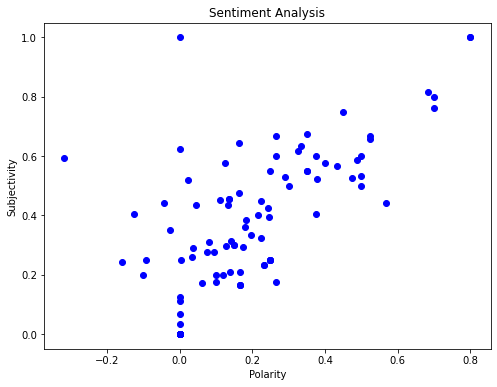

In [37]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [48]:
# Get percentage of Positive Tweets
ptweets = df[df['Analysis'] == 'Positive']
ptweets = ptweets['Tweets']
p_per = round((ptweets.shape[0]/df.shape[0]) *100 , 1)
p_per


73.0

In [47]:
# Get percentage of Negative Tweets
ntweets = df[df['Analysis'] == 'Negative']
ntweets = ntweets['Tweets']
n_per =round((ntweets.shape[0]/df.shape[0]) *100 , 1)
n_per

7.0

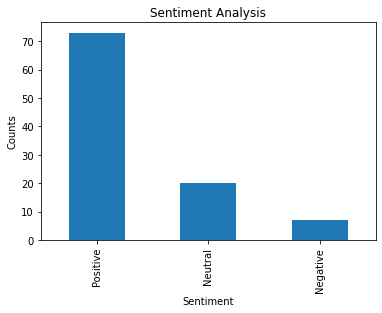

In [52]:
# Visualistaion
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
